## Simulated Annealing on Wind Placement

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('classic')

In [ ]:
!pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-cp36-none-any.whl size=11685 sha256=3ad9bef6f2582c0317dd4520a3a00dd58947a66bbb38e5cb10ad93339e177dc1
  Stored in directory: /root/.cache/pip/wheels/5a/56/ae/e0e3c1fc1954dc3ec712e2df547235ed072b448094d8f94aec
Successfully built bayesian-optimization


In [ ]:
from bayes_opt import BayesianOptimization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append('/content/drive/My Drive/Shell India Wind Competition')

In [ ]:
from Farm_Evaluator_Vec import *

In [ ]:
turb_coords = np.loadtxt('turbine_loc_test.csv', delimiter=',', skiprows=1)
power_curve   =  loadPowerCurve('power_curve.csv')
wind_inst_freq =  binWindResourceData(r'wind_data_2007.csv')
n_wind_instances, cos_dir, sin_dir, wind_sped_stacked, C_t = preProcessing(power_curve)

turb_rad = 50

AEP = getAEP(turb_rad, turb_coords, power_curve, wind_inst_freq, 
             n_wind_instances, cos_dir, sin_dir, wind_sped_stacked, C_t)

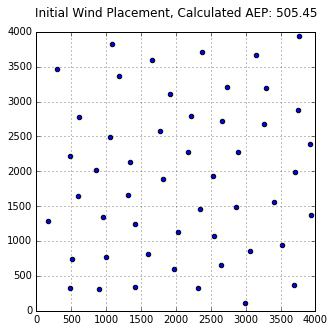

In [ ]:
x = turb_coords[:,0]
y = turb_coords[:,1]

plt.figure(figsize=(5,5))
plt.xlim(0,4000)
plt.ylim(0,4000)
plt.title('Initial Wind Placement, Calculated AEP: {}'.format(np.round(AEP, 2)), pad=15)
plt.scatter(x, y)
plt.grid()
plt.gca().set_aspect('equal')
plt.show()

In [ ]:
def obj_function(x, y):
  """
  This function randomize one of the points in the search space
  Actually pipelining to the real obj. function getAEP
  """
  turb_coords[i] = np.array([x, y])
  AEP = getAEP(turb_rad, turb_coords, power_curve, wind_inst_freq, 
               n_wind_instances, cos_dir, sin_dir, wind_sped_stacked, C_t)
  return AEP

Optimization happens here. This will optimize one-by-one turbine. Search space (x, y bounds) is 0 to 4000. Apply stopping criterion, e.g. AEP = 530

In [ ]:
turb_coords = np.loadtxt('turbine_loc_test.csv', delimiter=',', skiprows=1)
stop_criterion = 550

for i in range(50):
  # Bounded region of parameter space
  pbounds = {"x": (50, 3950), "y": (50, 3950)}

  optimizer = BayesianOptimization(
      f=obj_function,
      pbounds=pbounds,
      verbose=2,  # verbose = 1 prints only when a maximum is observed, verbose = 0 is silent
      random_state=42,
  )

  print('Optimization at turbine:', i+1)
  optimizer.maximize(init_points=5, n_iter=20)

  # stopping criterion when AEP hits max value we want
  if optimizer.max['target'] >= stop_criterion:
    print('Optimization ends at turbine:', i+1)
    break

  x_reloc = optimizer.max['params']['x']
  y_reloc = optimizer.max['params']['y']
  point_reloc = np.array([x_reloc, y_reloc])
  turb_coords[i] = point_reloc

Optimization at turbine: 1
|   iter    |  target   |     x     |     y     |
-------------------------------------------------
|  1        |  455.4    |  1.511e+0 |  3.758e+0 |
|  2        |  453.3    |  2.905e+0 |  2.385e+0 |
|  3        |  454.5    |  658.5    |  658.4    |
|  4        |  451.1    |  276.5    |  3.428e+0 |
|  5        |  454.1    |  2.394e+0 |  2.811e+0 |
|  6        |  455.4    |  1.508e+0 |  3.759e+0 |
|  7        |  454.8    |  1.498e+0 |  3.26e+03 |
|  8        |  455.4    |  2.311e+0 |  3.95e+03 |
|  9        |  455.3    |  3.082e+0 |  3.95e+03 |
|  10       |  455.4    |  3.934e+0 |  3.949e+0 |
|  11       |  456.4    |  3.931e+0 |  54.17    |
|  12       |  455.8    |  3.325e+0 |  50.0     |
|  13       |  456.1    |  3.941e+0 |  715.5    |
|  14       |  455.1    |  2.114e+0 |  50.0     |
|  15       |  454.2    |  3.19e+03 |  834.7    |
|  16       |  456.2    |  3.943e+0 |  382.4    |
|  17       |  454.2    |  3.95e+03 |  1.488e+0 |
|  18       |  455.1   

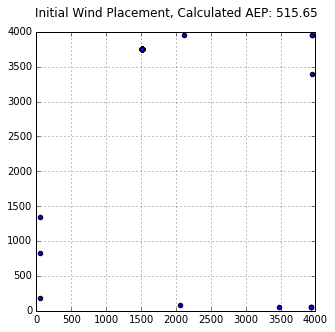

In [ ]:
x = turb_coords[:,0]
y = turb_coords[:,1]
optimized_AEP = optimizer.max['target']

plt.figure(figsize=(5,5))
plt.title('Initial Wind Placement, Calculated AEP: {}'.format(np.round(optimized_AEP, 2)), pad=15)
plt.xlim(0,4000)
plt.ylim(0,4000)
plt.scatter(x, y)
plt.grid()
plt.gca().set_aspect('equal')
plt.show()